In [1]:
import sys
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ''
os.environ['XLA_PYTHON_CLIENT_MEM_FRACTION'] = '.95'
sys.path.append('/mnt/local/data/vtrifonov/prec-learning-Notay-loss/')

In [2]:
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid

from utils import params_count
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 100)

In [3]:
path = '/mnt/local/data/vtrifonov/prec-learning-Notay-loss'

In [5]:
file = 'results_cases/27.03_final_elliptic_grid400_precor_gnn/kkofrg/losses_kkofrg.npz'

losses = np.load(os.path.join(path, file))

In [7]:
losses

NpzFile '/mnt/local/data/vtrifonov/prec-learning-Notay-loss/results_cases/27.03_final_elliptic_grid400_precor_gnn/kkofrg/losses_kkofrg.npz' with keys: train_loss, test_loss

In [9]:
len(losses['train_loss'])

500

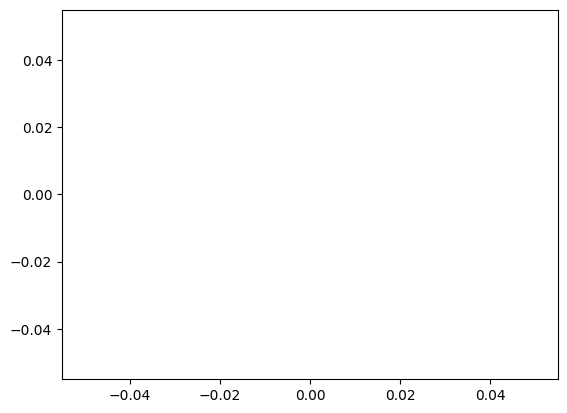

In [8]:
import matplotlib.pyplot as plt

plt.plot(range(len(losses['train_loss'])), losses['train_loss'], label='train')
plt.plot(range(len(losses['test_loss'])), losses['test_loss'], label='test')

In [4]:
path_baseline = 'results_cases/28.03_benchmark_elliptic_grid400_ic0'
path_precor = 'results_cases/27.03_final_elliptic_grid400_precor_gnn'
df_baseline = pd.read_csv(os.path.join(path, path_baseline, 'meta_data.csv'), index_col=0)
df_precor = pd.read_csv(os.path.join(path, path_precor, 'meta_data.csv'), index_col=0)

grid = 32
var = .1
q = f"pde == 'div_k_grad' and grid == {grid} and variance == {var}"

display(df_class_ict5.query(q).loc[:, ['lhs_type', 'fill_factor', 't_gnn_prec']])
display(df_class_ict5.query(q).loc[:, ['lhs_type', 'time_1e_3', 'time_1e_6', 'time_1e_9', 'time_1e_12']])
display(df_class_ict5.query(q).loc[:, ['lhs_type', 'iters_1e_3', 'iters_1e_6', 'iters_1e_9', 'iters_1e_12']])

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/local/data/vtrifonov/prec-learning-Notay-loss/results_cases/27.03_final_elliptic_grid400_precor_gnn/meta_data.csv'

In [7]:
df_class_ict5.columns

Index(['model_use', 'cg_maxiter', 'cg_atol', 'seed', 'model_type', 'use_nodes',
       'node_upd_mlp', 'static_diag', 'aggregate_edges', 'loss_type',
       'batch_size', 'lr', 'epoch_num', 'pde', 'grid', 'variance', 'lhs_type',
       'N_samples_train', 'N_samples_test', 'fill_factor', 'threshold',
       'train_loss', 'test_loss', 'alpha', 'time_data', 'time_train',
       'iters_1e_3', 'iters_1e_6', 'iters_1e_9', 'iters_1e_12', 'time_1e_3',
       'time_1e_6', 'time_1e_9', 'time_1e_12', 'nans_1e_3', 'nans_1e_6',
       'nans_1e_9', 'nans_1e_12', 't_gnn_prec'],
      dtype='object')

In [8]:
df_class_prec_32_256 = pd.read_csv(os.path.join(path, 'results_cases/30.01_benchmark_elliptic32_256_datasets', 'meta_data.csv'), index_col=0)

grid = 32
var = .1

q = f"pde == 'div_k_grad' and grid == {grid} and variance == {var}"
display(df_class_prec_32_256.query(q).loc[:, ['lhs_type', 'fill_factor', 't_class_prec']])
display(df_class_prec_32_256.query(q).loc[:, ['lhs_type', 'time_1e_3', 'time_1e_6', 'time_1e_9', 'time_1e_12']])
display(df_class_prec_32_256.query(q).loc[:, ['lhs_type', 'iters_1e_3', 'iters_1e_6', 'iters_1e_9', 'iters_1e_12']])

,lhs_type,fill_factor,t_class_prec
hjjbkk,l_ic0,1.0,"[1.013e-04, 7.823e-06]"
5sr5q8,l_ic0,1.0,"[7.295e-05, 2.727e-06]"
y17c2n,l_ict,1.0,"[3.097e-04, 3.181e-05]"


,lhs_type,time_1e_3,time_1e_6,time_1e_9,time_1e_12
hjjbkk,l_ic0,"[0.0484, 0.0047]","[0.0624, 0.0058]","[0.0741, 0.0068]","[0.0847, 0.0078]"
5sr5q8,l_ic0,"[0.0464, 0.0036]","[0.0598, 0.0046]","[0.0711, 0.0054]","[0.0812, 0.0062]"
y17c2n,l_ict,"[0.0325, 0.0030]","[0.0417, 0.0038]","[0.0498, 0.0046]","[0.0568, 0.0051]"


,lhs_type,iters_1e_3,iters_1e_6,iters_1e_9,iters_1e_12
hjjbkk,l_ic0,"[33.3, 0.67]","[43.2, 0.76]","[51.5, 0.57]","[58.9, 0.58]"
5sr5q8,l_ic0,"[33.3, 0.67]","[43.2, 0.76]","[51.5, 0.57]","[58.9, 0.58]"
y17c2n,l_ict,"[20.8, 0.47]","[26.9, 0.41]","[32.4, 0.49]","[37.1, 0.27]"


In [155]:
grid = 32
var = .1

q = f"pde == 'div_k_grad' and grid == {grid} and variance == {var}"
display(df_class_prec.query(q).loc[:, ['lhs_type', 'fill_factor', 't_class_prec']])
display(df_class_prec.query(q).loc[:, ['lhs_type', 'time_1e_3', 'time_1e_6', 'time_1e_9', 'time_1e_12']])
display(df_class_prec.query(q).loc[:, ['lhs_type', 'iters_1e_3', 'iters_1e_6', 'iters_1e_9', 'iters_1e_12']])

,lhs_type,fill_factor,t_class_prec


,lhs_type,time_1e_3,time_1e_6,time_1e_9,time_1e_12


,lhs_type,iters_1e_3,iters_1e_6,iters_1e_9,iters_1e_12


In [165]:
grid = 256
var = 0.7

q = f"pde == 'div_k_grad' and grid == {grid} and variance == {var}"
display(df_class_ict5.query(q).loc[:, ['t_class_prec']])
display(df_class_ict5.query(q).loc[:, ['time_1e_3', 'time_1e_6', 'time_1e_9', 'time_1e_12']])
display(df_class_ict5.query(q).loc[:, ['iters_1e_3', 'iters_1e_6', 'iters_1e_9', 'iters_1e_12']])

,t_class_prec
uccc4k,"[2.979e-02, 1.587e-03]"


,time_1e_3,time_1e_6,time_1e_9,time_1e_12
uccc4k,"[4.8003, 0.6236]","[5.9792, 0.7641]","[6.9382, 0.8739]","[7.7762, 0.9675]"


,iters_1e_3,iters_1e_6,iters_1e_9,iters_1e_12
uccc4k,"[101.8, 3.41]","[126.9, 3.37]","[147.4, 3.29]","[165.4, 3.32]"


In [175]:
grid = 256
var = .7
lhs_type = 'l_ict'

q = f"pde == 'div_k_grad' and grid == {grid} and variance == {var} and lhs_type == '{lhs_type}' and loss_type == 'low_freq_loss'"
display(df_precor_gnn.query(q).loc[:, ['t_gnn_prec']])
display(df_precor_gnn.query(q).loc[:, ['time_1e_3', 'time_1e_6', 'time_1e_9', 'time_1e_12']])
display(df_precor_gnn.query(q).loc[:, ['iters_1e_3', 'iters_1e_6', 'iters_1e_9', 'iters_1e_12']])

,t_gnn_prec
qxj418,"[1.431e-02, 6.829e-04]"


,time_1e_3,time_1e_6,time_1e_9,time_1e_12
qxj418,"[2.7978, 0.3572]","[3.4907, 0.4343]","[4.1264, 0.5091]","[4.7352, 0.5763]"


,iters_1e_3,iters_1e_6,iters_1e_9,iters_1e_12
qxj418,"[90.4, 6.96]","[113.0, 8.33]","[133.7, 9.41]","[153.5, 10.42]"


In [135]:
path = '/mnt/local/data/vtrifonov/prec-learning-Notay-loss/'

path_class_prec = 'results_cases/22.01_benchmark_elliptic_datasets'
path_precor_gnn = 'results_cases/29.01_final_elliptic_grid_precor_gnn'
path_precor_mlp = 'results_cases/22.01_elliptic_grid64_128_ablation_precor_mlp'

df_class_prec = pd.read_csv(os.path.join(path, path_class_prec, 'meta_data.csv'), index_col=0)
df_precor_gnn = pd.read_csv(os.path.join(path, path_precor_gnn, 'meta_data.csv'), index_col=0)
df_precor_mlp = pd.read_csv(os.path.join(path, path_precor_mlp, 'meta_data.csv'), index_col=0)

In [16]:
df_precor_mlp

,model_use,cg_maxiter,cg_atol,seed,model_type,use_nodes,node_upd_mlp,static_diag,aggregate_edges,loss_type,batch_size,lr,epoch_num,pde,grid,variance,lhs_type,N_samples_train,N_samples_test,fill_factor,threshold,train_loss,test_loss,alpha,time_data,time_train,iters_1e_3,iters_1e_6,iters_1e_9,iters_1e_12,time_1e_3,time_1e_6,time_1e_9,time_1e_12,nans_1e_3,nans_1e_6,nans_1e_9,nans_1e_12,t_gnn_prec
1c8jsi,train,500.0,1.000000e-12,42.0,precorrector_mlp,True,True,False,-,low_freq_loss,8.0,0.001,500.0,div_k_grad,64.0,0.5,l_ic0,1000.0,200.0,1.0,0.0001,9.772000e+02,9.915000e+02,0.2743,19.36,22.11,"[48.5, 2.43]","[62.2, 2.86]","[74.8, 3.31]","[87.2, 3.69]","[0.1101, 0.0103]","[0.1408, 0.0127]","[0.1692, 0.0150]","[0.1967, 0.0173]",0.0,0.0,0.0,0.0,"[2.058e-04, 4.635e-06]"
0q8q92,train,500.0,1.000000e-12,42.0,precorrector_mlp,True,True,False,-,low_freq_loss,8.0,0.001,500.0,div_k_grad,64.0,0.7,l_ic0,1000.0,200.0,1.0,0.0001,1.195000e+03,1.108000e+03,0.2716,18.22,20.23,"[57.5, 3.47]","[73.3, 4.16]","[88.2, 4.82]","[102.5, 5.56]","[0.1290, 0.0076]","[0.1640, 0.0092]","[0.1969, 0.0106]","[0.2286, 0.0122]",0.0,0.0,0.0,0.0,"[2.267e-04, 4.510e-06]"
agodz6,train,500.0,1.000000e-12,42.0,precorrector_mlp,True,True,False,-,low_freq_loss,8.0,0.001,500.0,div_k_grad,64.0,1.1,l_ic0,1000.0,200.0,1.0,0.0001,1.457000e+03,1.498000e+03,0.2601,15.70,19.27,"[73.2, 7.51]","[92.9, 9.25]","[111.4, 10.79]","[129.1, 12.05]","[0.1654, 0.0177]","[0.2093, 0.0216]","[0.2506, 0.0253]","[0.2901, 0.0284]",0.0,0.0,0.0,0.0,"[2.163e-04, 4.864e-06]"
a0gbfq,train,500.0,1.000000e-12,42.0,precorrector_mlp,True,True,False,-,high_freq_loss,8.0,0.001,500.0,div_k_grad,64.0,0.5,l_ic0,1000.0,200.0,1.0,0.0001,2.631000e+10,2.635000e+10,-0.0550,15.52,21.63,"[83.7, 2.65]","[106.6, 2.39]","[125.4, 2.51]","[141.7, 2.50]","[0.1846, 0.0059]","[0.2347, 0.0053]","[0.2756, 0.0057]","[0.3112, 0.0057]",0.0,0.0,0.0,0.0,"[2.103e-04, 4.844e-06]"
vcdfzk,train,500.0,1.000000e-12,42.0,precorrector_mlp,True,True,False,-,high_freq_loss,8.0,0.001,500.0,div_k_grad,64.0,0.7,l_ic0,1000.0,200.0,1.0,0.0001,4.124000e+10,4.159000e+10,-0.0524,15.37,21.34,"[87.8, 3.41]","[111.2, 3.49]","[130.1, 3.45]","[146.3, 3.31]","[0.1907, 0.0075]","[0.2411, 0.0077]","[0.2816, 0.0076]","[0.3163, 0.0074]",0.0,0.0,0.0,0.0,"[2.098e-04, 4.696e-06]"
xutuyg,train,500.0,1.000000e-12,42.0,precorrector_mlp,True,True,False,-,high_freq_loss,8.0,0.001,500.0,div_k_grad,64.0,1.1,l_ic0,1000.0,200.0,1.0,0.0001,7.632000e+10,7.722000e+10,-0.0540,15.21,21.46,"[97.2, 4.03]","[121.8, 4.15]","[141.3, 4.18]","[157.5, 3.99]","[0.2128, 0.0088]","[0.2661, 0.0090]","[0.3083, 0.0090]","[0.3436, 0.0087]",0.0,0.0,0.0,0.0,"[2.071e-04, 5.376e-06]"
tk300u,train,500.0,1.000000e-12,42.0,precorrector_mlp,True,True,False,-,low_freq_loss,8.0,0.001,500.0,div_k_grad,64.0,0.5,l_ict,1000.0,200.0,1.0,0.0001,5.668000e+02,5.986000e+02,0.3099,19.43,24.06,"[34.9, 3.51]","[44.7, 4.35]","[53.7, 5.15]","[62.2, 5.92]","[0.0858, 0.0084]","[0.1093, 0.0104]","[0.1309, 0.0123]","[0.1514, 0.0141]",0.0,0.0,0.0,0.0,"[9.147e-04, 4.464e-06]"
oq04t3,train,500.0,1.000000e-12,42.0,precorrector_mlp,True,True,False,-,low_freq_loss,8.0,0.001,500.0,div_k_grad,64.0,0.7,l_ict,1000.0,200.0,1.0,0.0001,8.155000e+02,7.236000e+02,0.3404,19.28,23.55,"[39.9, 5.34]","[50.9, 6.55]","[60.9, 7.69]","[70.4, 8.86]","[0.0978, 0.0128]","[0.1242, 0.0157]","[0.1482, 0.0184]","[0.1709, 0.0212]",0.0,0.0,0.0,0.0,"[9.270e-04, 4.400e-06]"
hwcmri,train,500.0,1.000000e-12,42.0,precorrector_mlp,True,True,False,-,low_freq_loss,8.0,0.001,500.0,div_k_grad,64.0,1.1,l_ict,1000.0,200.0,1.0,0.0001,1.072000e+03,1.108000e+03,0.3643,20.35,23.44,"[53.0, 12.71]","[67.0, 16.09]","[79.9, 19.01]","[92.3, 21.85]","[0.1265, 0.0299]","[0.1595, 0.0379]","[0.1898, 0.0448]","[0.2190, 0.0514]",0.0,0.0,0.0,0.0,"[9.025e-04, 4.241e-06]"
2rlnh2,train,500.0,1.000000e-12,42.0,precorrector_mlp,True,True,False,-,high_freq_loss,8.0,0.001,500.0,div_k_grad,64.0,0.5,l_ict,1000.0,200.0,1.0,0.0001,3.827000e+09,3.808000e+09,-0.0822,16.73,25.94,"[52.0, 1.97]"

In [22]:
var = .5
static_diag = False
df_precor_mlp.query(f'pde == "div_k_grad" and grid == 128 and variance == {var} and lhs_type == "l_ic0" and static_diag == {static_diag} and loss_type == "low_freq_loss"')

,model_use,cg_maxiter,cg_atol,seed,model_type,use_nodes,node_upd_mlp,static_diag,aggregate_edges,loss_type,batch_size,lr,epoch_num,pde,grid,variance,lhs_type,N_samples_train,N_samples_test,fill_factor,threshold,train_loss,test_loss,alpha,time_data,time_train,iters_1e_3,iters_1e_6,iters_1e_9,iters_1e_12,time_1e_3,time_1e_6,time_1e_9,time_1e_12,nans_1e_3,nans_1e_6,nans_1e_9,nans_1e_12,t_gnn_prec
aakhwb,train,500.0,1.000000e-12,42.0,precorrector_mlp,True,True,False,-,low_freq_loss,8.0,0.001,500.0,div_k_grad,128.0,0.5,l_ic0,1000.0,200.0,1.0,0.0001,3333.0,3368.0,0.216,23.53,49.6,"[80.6, 3.97]","[102.7, 4.72]","[123.5, 5.46]","[143.4, 5.99]","[0.5824, 0.0906]","[0.7405, 0.1145]","[0.8888, 0.1368]","[1.0308, 0.1567]",0.0,0.0,0.0,0.0,"[5.096e-04, 4.215e-06]"


In [87]:
plt.rcParams['font.size'] = 12

def print_mean_std(ax, stats, line_args, fill_args, ylim):
    mean_ = np.array([ast.literal_eval(stats[i])[0] for i in range(4)])
    std_ = np.array([ast.literal_eval(stats[i])[1] for i in range(4)])
        
    ax.plot(range(4), mean_, **line_args)
    ax.fill_between(range(4), mean_-std_, mean_+std_, **fill_args)
    
    ax.set_xticks(range(4), [f'{1e-3:.0e}', f'{1e-6:.0e}', f'{1e-9:.0e}', f'{1e-12:.0e}'])
    if ylim is not None:
        ax.set_ylim(ylim)
    ax.grid(linewidth=.2)
    
#     ax.legend()
    return ax, mean_[-1]

def ablation_plot(figsize, df_gnn, df_class, df_mlp, c1='firebrick', c2='royalblue', c3='darkgreen', c4='goldenrod'):
    fig, axes = plt.subplots(2, 3, figsize=figsize, sharex=True, sharey=True)

    _mean_ls = []
    for j, var in enumerate([.5, .7, 1.1]):
        q = f"pde == 'div_k_grad' and variance == {var} and grid == 128 and lhs_type == 'l_ic0'"
        
        gnn_res = df_gnn.query(q+"and loss_type == 'low_freq_loss'")[['iters_1e_3', 'iters_1e_6', 'iters_1e_9', 'iters_1e_12']].values.squeeze()
        class_res = df_class.query(q)[['iters_1e_3', 'iters_1e_6', 'iters_1e_9', 'iters_1e_12']].values.squeeze()

        mlp_stats = df_mlp.query(q+f'and static_diag == False and loss_type == "low_freq_loss"')[['iters_1e_3', 'iters_1e_6', 'iters_1e_9', 'iters_1e_12']].values.squeeze()
        mlp_static_stats = df_mlp.query(q+f'and static_diag == True and loss_type == "low_freq_loss"')[['iters_1e_3', 'iters_1e_6', 'iters_1e_9', 'iters_1e_12']].values.squeeze()
        
        _, _mean_mlp_static = print_mean_std(axes[0][j], stats=mlp_static_stats, ylim=None,
                                              line_args = {'color': c4, 'label':'PreCor w/ MLP, static diag'},
                                              fill_args = {'color': c4, 'alpha':.1})
        _, _mean_mlp = print_mean_std(axes[0][j], stats=mlp_stats, ylim=None,
                                              line_args = {'color': c3, 'label':'PreCor w/ MLP'},
                                              fill_args = {'color': c3, 'alpha':.1})
        _, _mean_gnn = print_mean_std(axes[0][j], stats=gnn_res, ylim=None,
                                              line_args = {'color': c2, 'label':'PreCor w/ GNN'},
                                              fill_args = {'color': c2, 'alpha':.1})
        _, _mean_class = print_mean_std(axes[0][j], stats=class_res, ylim=None,
                                              line_args = {'color': c1, 'label':'IC(0)'},
                                              fill_args = {'color': c1, 'alpha':.1})

        _mean_ls.append(_mean_class)
        _mean_ls.append(_mean_gnn)
        _mean_ls.append(_mean_mlp)
        _mean_ls.append(_mean_mlp_static)
        
#     _mean_ls = []
    for j, var in enumerate([.5, .7, 1.1]):
        q = f"pde == 'div_k_grad' and variance == {var} and grid == 128 and lhs_type == 'l_ict'"
        
        gnn_res = df_gnn.query(q+"and loss_type == 'low_freq_loss'")[['iters_1e_3', 'iters_1e_6', 'iters_1e_9', 'iters_1e_12']].values.squeeze()
        class_res = df_class.query(q)[['iters_1e_3', 'iters_1e_6', 'iters_1e_9', 'iters_1e_12']].values.squeeze()

        mlp_stats = df_mlp.query(q+f'and static_diag == False and loss_type == "low_freq_loss"')[['iters_1e_3', 'iters_1e_6', 'iters_1e_9', 'iters_1e_12']].values.squeeze()
        mlp_static_stats = df_mlp.query(q+f'and static_diag == True and loss_type == "low_freq_loss"')[['iters_1e_3', 'iters_1e_6', 'iters_1e_9', 'iters_1e_12']].values.squeeze()
        
        _, _mean_mlp_static = print_mean_std(axes[1][j], stats=mlp_static_stats, ylim=None,
                                              line_args = {'color': c4, 'label':'PreCor w/ MLP, static diag'},
                                              fill_args = {'color': c4, 'alpha':.1})
        _, _mean_mlp = print_mean_std(axes[1][j], stats=mlp_stats, ylim=None,
                                              line_args = {'color': c3, 'label':'PreCor w/ MLP'},
                                              fill_args = {'color': c3, 'alpha':.1})
        _, _mean_gnn = print_mean_std(axes[1][j], stats=gnn_res, ylim=None,
                                              line_args = {'color': c2, 'label':'PreCor w/ GNN'},
                                              fill_args = {'color': c2, 'alpha':.1})
        _, _mean_class = print_mean_std(axes[1][j], stats=class_res, ylim=None,
                                              line_args = {'color': c1, 'label':'IC(0)'},
                                              fill_args = {'color': c1, 'alpha':.1})

        _mean_ls.append(_mean_class)
        _mean_ls.append(_mean_gnn)
        _mean_ls.append(_mean_mlp)
        _mean_ls.append(_mean_mlp_static)
        
    for j, var in enumerate([.5, .7, 1.1]):
        axes[0][j].text(2.5, 50, f'Variance {var}', fontsize=11, horizontalalignment='center')
    for j, var in enumerate([.5, .7, 1.1]):
        axes[1][j].text(2.5, 50, f'Variance {var}', fontsize=11, horizontalalignment='center')

    fig.supylabel("Number of iterations", x=0.01)
    axes[0, 0].legend(loc='upper left', fancybox=True, framealpha=0.)
    axes[1, 0].legend(loc='upper left', fancybox=True, framealpha=0.)
    fig.supxlabel("Tolerance", y=0.05)
    plt.tight_layout()
    plt.show()
    return fig, axes

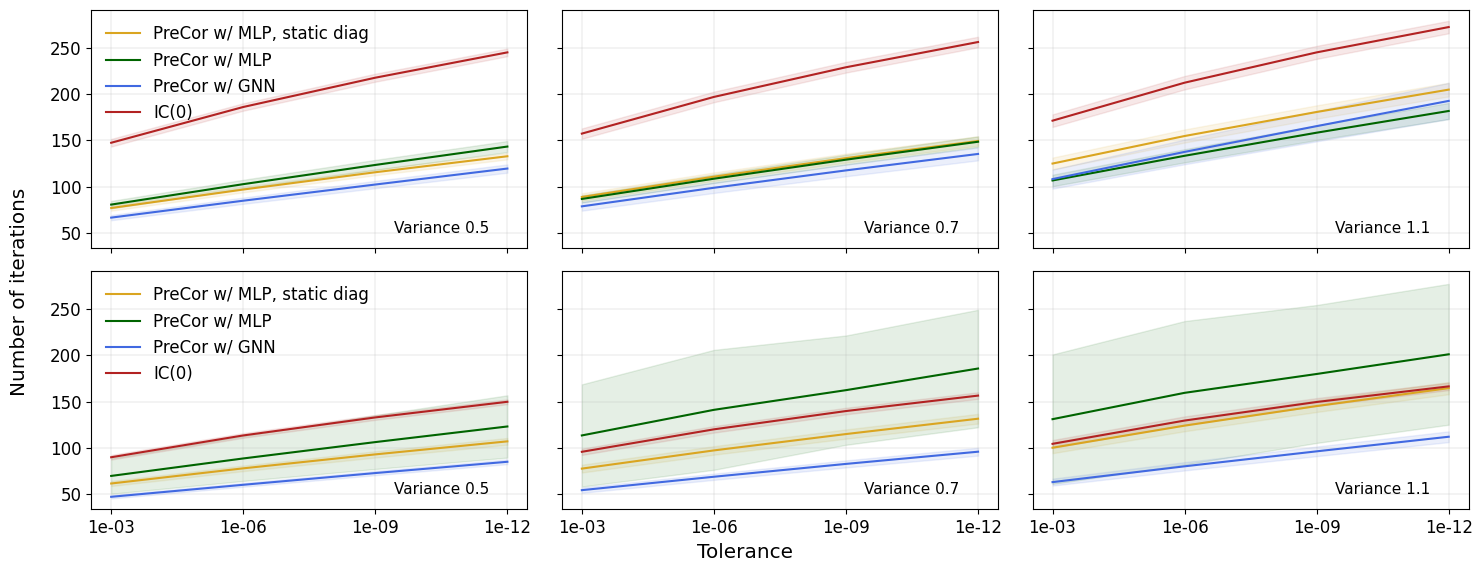

(<Figure size 1500x600 with 6 Axes>,
 array([[<Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >]], dtype=object))

In [88]:
ablation_plot((15, 6), df_precor_gnn, df_class_prec, df_precor_mlp)

In [16]:
path = '/mnt/local/data/vtrifonov/prec-learning-Notay-loss/'
path_class_prec = 'results_cases/22.01_benchmark_elliptic_datasets'
path_class_prec_ict5 = 'results_cases/29.01_benchmark_elliptic_datasets_ict5'
path_precor_gnn = 'results_cases/29.01_final_elliptic_grid_precor_gnn'
# path_precor_mlp = 'results_cases/23.01_elliptic_grid256_ablation_precor_mlp'

In [17]:
df_class_prec = pd.read_csv(os.path.join(path, path_class_prec, 'meta_data.csv'), index_col=0)
df_class_prec_ict5 = pd.read_csv(os.path.join(path, path_class_prec_ict5, 'meta_data.csv'), index_col=0)
df_precor_gnn = pd.read_csv(os.path.join(path, path_precor_gnn, 'meta_data.csv'), index_col=0)
# df_precor_mlp = pd.read_csv(os.path.join(path, path_precor_mlp, 'meta_data.csv'), index_col=0)

In [61]:
df_precor_gnn.query(f"pde == 'div_k_grad' and lhs_type == 'l_ic0' and loss_type == 'low_freq_loss'").loc[:, ['grid', 'variance', 'alpha']]

,grid,variance,alpha
1qk66l,64.0,0.5,0.0796
68f847,64.0,0.7,0.0859
u0ktoy,64.0,1.1,0.0605
04cgem,128.0,0.5,0.0749
009nt9,128.0,0.7,0.0610
h2xeis,128.0,1.1,0.0598
auqo81,256.0,0.5,0.0743
nvhown,256.0,0.7,0.0553
us1puz,256.0,1.1,0.0480


In [63]:
f_class_prec_32 = pd.read_csv(os.path.join(path, 'results_cases/30.01_benchmark_elliptic32_256_datasets', 'meta_data.csv'), index_col=0)
df_class_prec_32.query(f"pde == 'div_k_grad' and variance == 1.1 and grid == 256 and lhs_type == 'l_ic0'")#.loc[:, ['iters_1e_3', 'iters_1e_6', 'iters_1e_9', 'iters_1e_12']]

,cg_maxiter,cg_atol,seed,pde,grid,variance,lhs_type,N_samples_train,N_samples_test,fill_factor,threshold,time_data,iters_1e_3,iters_1e_6,iters_1e_9,iters_1e_12,time_1e_3,time_1e_6,time_1e_9,time_1e_12,nans_1e_3,nans_1e_6,nans_1e_9,nans_1e_12,t_class_prec
16iji7,2000.0,1.000000e-12,42.0,div_k_grad,256.0,1.1,l_ic0,1000.0,200.0,1.0,0.0001,5.885,"[344.6, 13.52]","[425.2, 14.85]","[490.1, 14.93]","[544.4, 14.41]","[10.4032, 0.9344]","[12.8210, 1.0866]","[14.7852, 1.2114]","[16.4169, 1.2996]",0.0,0.0,0.0,0.0,"[1.864e-03, 1.769e-04]"


In [64]:
# df_class_prec_32 = pd.read_csv(os.path.join(path, 'results_cases/30.01_benchmark_elliptic32_256_datasets', 'meta_data.csv'), index_col=0)
# df_class_prec_32.query(f"pde == 'div_k_grad' and variance == .5 and grid == 256 and lhs_type == 'l_ic0'")#.loc[:, ['iters_1e_3', 'iters_1e_6', 'iters_1e_9', 'iters_1e_12']]

In [18]:
df_class_prec_ict5

,cg_maxiter,cg_atol,seed,pde,grid,variance,lhs_type,N_samples_train,N_samples_test,fill_factor,threshold,time_data,iters_1e_3,iters_1e_6,iters_1e_9,iters_1e_12,time_1e_3,time_1e_6,time_1e_9,time_1e_12,nans_1e_3,nans_1e_6,nans_1e_9,nans_1e_12,t_class_prec
nirc42,2000.0,1.000000e-12,42.0,div_k_grad,64.0,0.5,l_ict,1000.0,200.0,5.0,0.0001,105.500,"[22.0, 0.73]","[28.3, 0.64]","[33.8, 0.62]","[38.6, 0.67]","[0.0776, 0.0027]","[0.0991, 0.0027]","[0.1178, 0.0029]","[0.1341, 0.0033]",0.0,0.0,0.0,0.0,"[2.102e-03, 2.150e-04]"
zwpi22,2000.0,1.000000e-12,42.0,div_k_grad,64.0,0.7,l_ict,1000.0,200.0,5.0,0.0001,24.040,"[22.6, 0.83]","[29.0, 0.85]","[34.3, 0.80]","[39.1, 0.84]","[0.0797, 0.0030]","[0.1016, 0.0031]","[0.1199, 0.0029]","[0.1362, 0.0030]",0.0,0.0,0.0,0.0,"[2.102e-03, 1.872e-04]"
fw9u6o,2000.0,1.000000e-12,42.0,div_k_grad,64.0,1.1,l_ict,1000.0,200.0,5.0,0.0001,20.320,"[23.4, 0.91]","[29.9, 0.90]","[35.3, 0.99]","[40.1, 0.99]","[0.0824, 0.0031]","[0.1042, 0.0031]","[0.1227, 0.0034]","[0.1389, 0.0034]",0.0,0.0,0.0,0.0,"[2.076e-03, 4.142e-05]"
82lt3z,2000.0,1.000000e-12,42.0,div_k_grad,128.0,0.5,l_ict,1000.0,200.0,5.0,0.0001,135.600,"[46.0, 1.35]","[58.5, 1.36]","[68.8, 1.30]","[77.8, 1.27]","[0.5820, 0.0656]","[0.7369, 0.0815]","[0.8654, 0.0963]","[0.9768, 0.1084]",0.0,0.0,0.0,0.0,"[7.854e-03, 5.547e-04]"
7yb84x,2000.0,1.000000e-12,42.0,div_k_grad,128.0,0.7,l_ict,1000.0,200.0,5.0,0.0001,69.150,"[48.5, 1.66]","[61.1, 1.66]","[71.4, 1.80]","[80.4, 1.71]","[0.6605, 0.0528]","[0.8291, 0.0649]","[0.9675, 0.0753]","[1.0877, 0.0837]",0.0,0.0,0.0,0.0,"[7.546e-03, 4.182e-04]"
e7tyog,2000.0,1.000000e-12,42.0,div_k_grad,128.0,1.1,l_ict,1000.0,200.0,5.0,0.0001,38.130,"[52.1, 2.05]","[65.0, 2.10]","[75.5, 2.02]","[84.3, 1.95]","[0.7158, 0.0536]","[0.8900, 0.0622]","[1.0326, 0.0698]","[1.1522, 0.0754]",0.0,0.0,0.0,0.0,"[7.446e-03, 3.430e-04]"
1u4k84,2000.0,1.000000e-12,42.0,div_k_grad,256.0,0.5,l_ict,1000.0,200.0,5.0,0.0001,189.400,"[97.1, 2.70]","[121.4, 2.91]","[141.5, 2.81]","[159.5, 2.60]","[4.7762, 0.4102]","[5.9584, 0.5067]","[6.9423, 0.5827]","[7.8168, 0.6496]",0.0,0.0,0.0,0.0,"[3.044e-02, 1.564e-03]"
uccc4k,2000.0,1.000000e-12,42.0,div_k_grad,256.0,0.7,l_ict,1000.0,200.0,5.0,0.0001,122.100,"[101.8, 3.41]","[126.9, 3.37]","[147.4, 3.29]","[165.4, 3.32]","[4.8003, 0.6236]","[5.9792, 0.7641]","[6.9382, 0.8739]","[7.7762, 0.9675]",0.0,0.0,0.0,0.0,"[2.979e-02, 1.587e-03]"
xtueyq,2000.0,1.000000e-12,42.0,div_k_grad,256.0,1.1,l_ict,1000.0,200.0,5.0,0.0001,96.140,"[109.7, 4.44]","[135.9, 4.61]","[157.0, 4.58]","[174.8, 4.58]","[5.0312, 0.6223]","[6.2223, 0.7540]","[7.1781, 0.8517]","[7.9872, 0.9421]",0.0,0.0,0.0,0.0,"[2.954e-02, 7.454e-04]"
lxb9l3,2000.0,1.000000e-12,42.0,poisson,64.0,0.5,l_ict,1000.0,200.0,5.0,0.0001,4.705,"[22.0, 0.00]","[28.0, 0.00]","[33.0, 0.00]","[38.0, 0.00]","[0.0738, 0.0004]","[0.0932, 0.0005]","[0.1094, 0.0005]","[0.1256, 0.0006]",0.0,0.0,0.0,0.0,"[1.839e-03, 4.885e-05]"


In [8]:
df_class_prec256 = None

In [24]:
pde = 'div_k_grad'
var = 1.1
grid = 256
lhs_type = 'l_ict'
q = f"pde == '{pde}' and variance == {var} and grid == {grid} and lhs_type == '{lhs_type}' and loss_type == 'low_freq_loss'"

needed_props = ['nans_1e_12', 't_gnn_prec', 'time_1e_3', 'time_1e_6',
                'time_1e_9', 'time_1e_12', 'iters_1e_3', 'iters_1e_6',
                'iters_1e_9', 'iters_1e_12',]

In [25]:
q_cl = f"pde == '{pde}' and variance == {var} and grid == {grid} and lhs_type == 'l_ict'"
df_loc = df_class_prec if grid != 256 else df_class_prec256
print('Classical ICt5')
display(df_class_prec_ict5.query(q_cl)[['nans_1e_12', 't_class_prec']])
display(df_class_prec_ict5.query(q_cl)[['time_1e_3', 'time_1e_6','time_1e_9', 'time_1e_12']])
display(df_class_prec_ict5.query(q_cl)[['iters_1e_3', 'iters_1e_6','iters_1e_9', 'iters_1e_12']])

Classical ICt5


,nans_1e_12,t_class_prec
xtueyq,0.0,"[2.954e-02, 7.454e-04]"


,time_1e_3,time_1e_6,time_1e_9,time_1e_12
xtueyq,"[5.0312, 0.6223]","[6.2223, 0.7540]","[7.1781, 0.8517]","[7.9872, 0.9421]"


,iters_1e_3,iters_1e_6,iters_1e_9,iters_1e_12
xtueyq,"[109.7, 4.44]","[135.9, 4.61]","[157.0, 4.58]","[174.8, 4.58]"


In [26]:
print('PreCorrector')
display(df_precor_gnn.query(q)[['nans_1e_12', 't_gnn_prec']])
display(df_precor_gnn.query(q)[['time_1e_3', 'time_1e_6','time_1e_9', 'time_1e_12']])
display(df_precor_gnn.query(q)[['iters_1e_3', 'iters_1e_6','iters_1e_9', 'iters_1e_12']])

PreCorrector


,nans_1e_12,t_gnn_prec
65ezib,0.0,"[1.414e-02, 6.830e-04]"


,time_1e_3,time_1e_6,time_1e_9,time_1e_12
65ezib,"[2.7187, 0.3810]","[3.3783, 0.4624]","[3.9761, 0.5393]","[4.5339, 0.6076]"


,iters_1e_3,iters_1e_6,iters_1e_9,iters_1e_12
65ezib,"[105.3, 8.25]","[131.1, 9.83]","[154.4, 11.20]","[176.2, 12.41]"


In [17]:
q_cl = f"pde == '{pde}' and variance == {var} and grid == {grid} and lhs_type == '{lhs_type}'"
df_loc = df_class_prec if grid != 256 else df_class_prec256
print('classical precs')
display(df_loc.query(q_cl)[['nans_1e_12', 't_class_prec']])
display(df_loc.query(q_cl)[['time_1e_3', 'time_1e_6','time_1e_9', 'time_1e_12']])
display(df_loc.query(q_cl)[['iters_1e_3', 'iters_1e_6','iters_1e_9', 'iters_1e_12']])

classical precs


,nans_1e_12,t_class_prec
bvblrb,0.0,"[8.602e-04, 1.837e-05]"


,time_1e_3,time_1e_6,time_1e_9,time_1e_12
bvblrb,"[0.1241, 0.0052]","[0.1556, 0.0057]","[0.1810, 0.0056]","[0.2023, 0.0056]"


,iters_1e_3,iters_1e_6,iters_1e_9,iters_1e_12
bvblrb,"[51.3, 2.14]","[64.6, 2.28]","[75.2, 2.26]","[84.2, 2.19]"


In [5]:
def plot_losses(folder, name_slice, figsize, pic_per_row=4, df=None):
    path = '/mnt/local/data/vtrifonov/prec-learning-Notay-loss'
    _, axes = plt.subplots((len(name_slice)+(pic_per_row-1)) // pic_per_row, pic_per_row, figsize=figsize)
    axes = axes.ravel()
    
    for ax, n_ in zip(axes, name_slice):
        losses = np.load(os.path.join(path, folder, n_, 'losses_'+n_+'.npz'))
        ax.plot(range(len(losses['train_loss'])), losses['train_loss'], label='Train')
        
        label = 'Test'
        if isinstance(df, pd.DataFrame):
            label += ' ' + str([(a[0], a[1].values[0]) for a in df.loc[[n_], ['loss_type']].items()])
        ax.plot(range(len(losses['test_loss'])), losses['test_loss'], label=label)
        ax.set_title(n_)
        ax.set_yscale('log')
        ax.legend()
    return

def parse_classical(df, pde, grid, variance, lhs_type):
    subdf = df.query(f'pde == "{pde}" and grid == {grid} and variance == {variance} and lhs_type == "{lhs_type}"')
    return subdf[['iters_1e_3', 'iters_1e_6', 'iters_1e_9', 'iters_1e_12']].values.squeeze()

def parse_precorrector(df, pde, grid, variance, lhs_type, static_diag, loss_type):
    subdf = df.query(f'pde == "{pde}" and grid == {grid}  and variance == {variance} and lhs_type == "{lhs_type}" and static_diag == {static_diag} and loss_type == "{loss_type}"')
    return subdf.iloc[0:1, :][['iters_1e_3', 'iters_1e_6', 'iters_1e_9', 'iters_1e_12']].values.squeeze()

def parse_single_run(axes, ylim, pde, grid, variance, lhs_type, static_diag, loss_type):
    classical_res = parse_classical(df_class_prec, pde, grid, variance, lhs_type)
    precor_gnn_res = parse_precorrector(df_precor_gnn, pde, grid, variance, lhs_type, static_diag, loss_type)
    precor_mlp_res = parse_precorrector(df_precor_mlp, pde, grid, variance, lhs_type, static_diag, loss_type)
    
    axes.plot(range(4), [ast.literal_eval(classical_res[i])[0] for i in range(4)], 'o-', label='IC')
    axes.plot(range(4), [ast.literal_eval(precor_gnn_res[i])[0] for i in range(4)], 'o-', label='PreCorGNN')
    axes.plot(range(4), [ast.literal_eval(precor_mlp_res[i])[0] for i in range(4)], 'o-', label='PreCorMLP')
    axes.set_xticks(range(4), [f'{1e-3:.0e}', f'{1e-6:.0e}', f'{1e-9:.0e}', f'{1e-12:.0e}'])
    axes.set_title(f'{grid}, {variance}, {lhs_type}, {loss_type}, static{static_diag}')
    axes.set_ylim(ylim)
    axes.legend()
    return

def print_results(f, pde_ls, grid_ls, variance_ls, lhs_type_ls, static_diag_ls, loss_type_ls, figsize, ylim=None, pic_per_row=4):
    len_ = np.prod([len(pde_ls), len(grid_ls), len(variance_ls), len(lhs_type_ls), len(static_diag_ls), len(loss_type_ls)])
    _, axes = plt.subplots((len_+(pic_per_row-1)) // pic_per_row, pic_per_row, figsize=figsize)
    axes = axes.ravel()
    
    grid_parser = ParameterGrid({
        'pde': pde_ls, 
        'grid': grid_ls,
        'variance': variance_ls,
        'lhs_type': lhs_type_ls,
        'static_diag': static_diag_ls,
        'loss_type': loss_type_ls
    })
    for ax, single_run in zip(axes, grid_parser):
        f(ax, ylim, **single_run)
    return

def per_pde(axes, ylim, pde, grid, variance, lhs_type='l_ic0', static_diag=None, loss_type='low_freq_loss'):
    classical_res = parse_classical(df_class_prec, pde, grid, variance, lhs_type)
    axes.plot(range(4), [ast.literal_eval(classical_res[i])[0] for i in range(4)], 'k', label='IC')
    
    
    # GNN
#     precor_gnn_res_static = parse_precorrector(df_precor_gnn, pde, grid, variance, lhs_type, static_diag=True, loss_type=loss_type)
    precor_gnn_res = parse_precorrector(df_precor_gnn, pde, grid, variance, lhs_type, static_diag=False, loss_type=loss_type)

#     mean_ = np.array([ast.literal_eval(precor_gnn_res_static[i])[0] for i in range(4)])
#     std_ = np.array([ast.literal_eval(precor_gnn_res_static[i])[1] for i in range(4)])
#     axes.plot(range(4), mean_, '-', color='royalblue', label='PreCorGNN, Static diag')
#     axes.fill_between(range(4), mean_-std_, mean_+std_, color='royalblue', alpha=.2)

    mean_ = np.array([ast.literal_eval(precor_gnn_res[i])[0] for i in range(4)])
    std_ = np.array([ast.literal_eval(precor_gnn_res[i])[1] for i in range(4)])
    axes.plot(range(4), mean_, '-', color='seagreen', label='PreCorGNN, Not static diag')
    axes.fill_between(range(4), mean_-std_, mean_+std_, color='seagreen', alpha=.2)

    
    # MLP
    precor_mlp_res_static = parse_precorrector(df_precor_mlp, pde, grid, variance, lhs_type, static_diag=True, loss_type=loss_type)
    precor_mlp_res = parse_precorrector(df_precor_mlp, pde, grid, variance, lhs_type, static_diag=False, loss_type=loss_type)
    
    mean_ = np.array([ast.literal_eval(precor_mlp_res_static[i])[0] for i in range(4)])
    std_ = np.array([ast.literal_eval(precor_mlp_res_static[i])[1] for i in range(4)])
    axes.plot(range(4), mean_, '-', color='firebrick', label='PreCorMLP, Static diag')
    axes.fill_between(range(4), mean_-std_, mean_+std_, color='firebrick', alpha=.2)
    
    mean_ = np.array([ast.literal_eval(precor_mlp_res[i])[0] for i in range(4)])
    std_ = np.array([ast.literal_eval(precor_mlp_res[i])[1] for i in range(4)])
    axes.plot(range(4), mean_, '-', color='goldenrod', label='PreCorMLP, Not static diag')
    axes.fill_between(range(4), mean_-std_, mean_+std_, color='goldenrod', alpha=.2)
    
    axes.set_xticks(range(4), [f'{1e-3:.0e}', f'{1e-6:.0e}', f'{1e-9:.0e}', f'{1e-12:.0e}'])
    axes.set_title(f'{grid}, {variance}')
    axes.set_ylim(ylim)
    axes.legend()
    return

### Check losses

In [6]:
df_precor_gnn.index.values, df_precor_gnn.index.values.shape

(array(['1qk66l', '68f847', 'u0ktoy', 'k6dud3', 'p0fo2v', 'vkerv4',
        '2404zw', 'b6pmrp', 'l8ywee', '9ft55a', 'w6vqs5', 'k70h7s',
        '04cgem', '009nt9', 'h2xeis', '5fi3kb', '9jhrg6', 'tpr3a6',
        'rbx1p0', 'qgiklg', 'h58rup', 'zg6dof', 'pt5cre', 'kfu3p9',
        '8pjjqz', 'nh0ag9', '9pghox', 'hbobcd', 'u71egc', 'jyi2ox',
        'mkdufk', 'xrof7x', 'auqo81', 'nvhown', 'us1puz', 'ns1yi8',
        'qxj418', '65ezib', 'w1jhg1', '86qdfq'], dtype=object),
 (40,))

In [7]:
# a, b = 
# plot_losses(folder = path_precor_gnn,
#             name_slice = df_precor_gnn.index.values[a:b],
#             figsize = (20, 20),
#             pic_per_row = 4,
#             df = df_precor_gnn)
# plt.tight_layout()
# plt.show();

### All models per pde

IndexError: index 0 is out of bounds for axis 0 with size 0

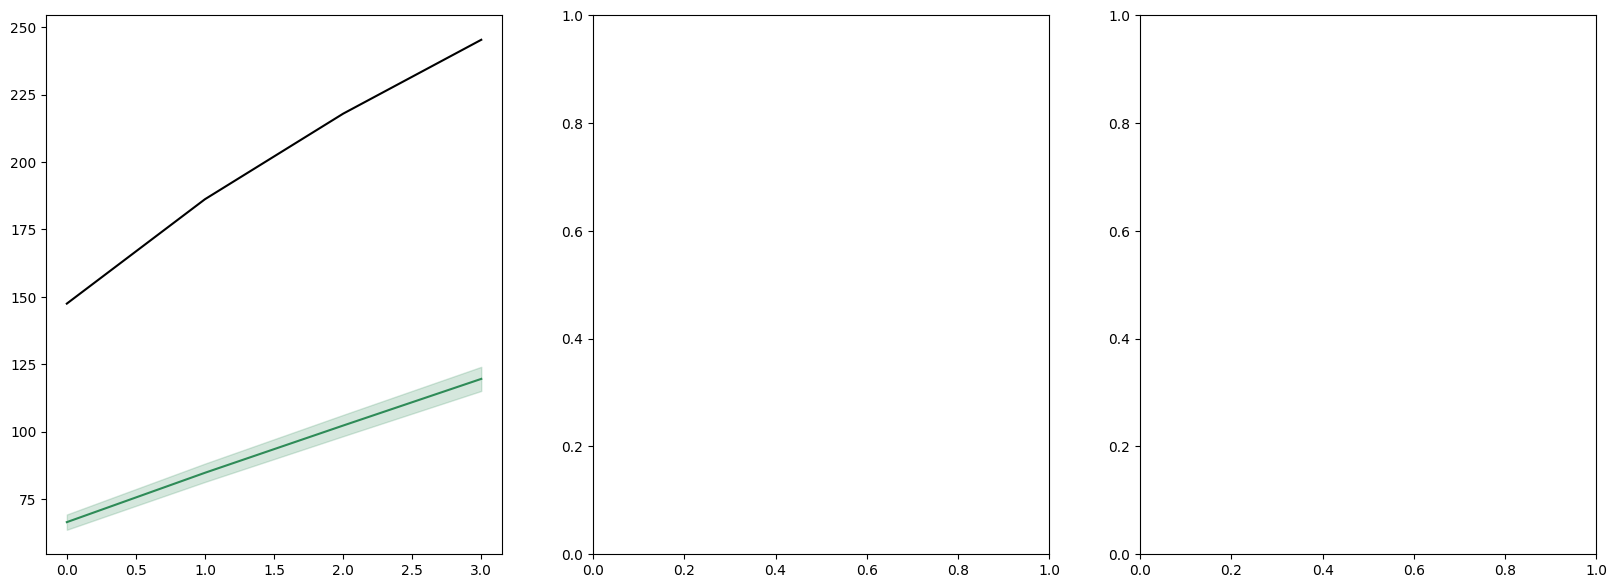

In [8]:
print_results(f = per_pde,
              pde_ls = ['div_k_grad'],
              grid_ls = [128],
              variance_ls = [.5, .7, 1.1],
              lhs_type_ls = ['l_ic0'],
              static_diag_ls = [None],
              loss_type_ls = ['low_freq_loss'],
              figsize = (20, 7),
              ylim=None,
              pic_per_row=3)
# print('div-k-grad, l_ic0')
plt.tight_layout()
plt.show();

In [89]:
def print_mean_std(ax, var, grid, is_time, stats, line_args, fill_args, ylim, lhs_type, is_gnn):
    mean_ = np.array([ast.literal_eval(stats[i])[0] for i in range(4)])
    std_ = np.array([ast.literal_eval(stats[i])[1] for i in range(4)])
    
    if (var == .7) and (grid == 128) and is_time and (lhs_type == 'l_ic0') and not is_gnn:
        mean_ = np.array([1.0056, 1.257, 1.4605, 1.6335])
        std_ = np.array([0.14208, 0.16833, 0.194, 0.21383])
        
    ax.plot(range(4), mean_, **line_args)
    ax.fill_between(range(4), mean_-std_, mean_+std_, **fill_args)
    
    ax.set_xticks(range(4), [f'{1e-3:.0e}', f'{1e-6:.0e}', f'{1e-9:.0e}', f'{1e-12:.0e}'])
    if ylim is not None:
        ax.set_ylim(ylim)
    ax.grid(linewidth=.2)
    
#     ax.legend()
    return ax, mean_[-1]
    
def print_for_paper(grid, df_gnn, df_class, figsize, print_iters=True, c1='firebrick', c2='royalblue', c3='darkgreen', c4='goldenrod'):
    fig, axes = plt.subplots(1, 3, figsize=figsize, sharex=True, sharey=True)
    lhs_name = {'l_ic0': 'IC(0)', 'l_ict': 'ICt(1)'}

    lhs_type = 'l_ic0'
    _mean_ls = []
    for j, var in enumerate([.5, .7, 1.1]):
        q = f"pde == 'div_k_grad' and variance == {var} and grid == {grid} and lhs_type == '{lhs_type}'"
        if print_iters:
            gnn_res = df_gnn.query(q+"and loss_type == 'low_freq_loss'")[['iters_1e_3', 'iters_1e_6', 'iters_1e_9', 'iters_1e_12']].values.squeeze()
        else:
            gnn_res = df_gnn.query(q+"and loss_type == 'low_freq_loss'")[['time_1e_3', 'time_1e_6', 'time_1e_9', 'time_1e_12']].values.squeeze()  

        if print_iters:
            class_res = df_class.query(q)[['iters_1e_3', 'iters_1e_6', 'iters_1e_9', 'iters_1e_12']].values.squeeze()
        else:
            class_res = df_class.query(q)[['time_1e_3', 'time_1e_6', 'time_1e_9', 'time_1e_12']].values.squeeze()  

        axes[j], _mean_class = print_mean_std(axes[j], var, grid, is_time=not print_iters,
                                              stats=class_res, ylim=None, lhs_type=lhs_type, is_gnn=False,
                                              line_args = {'color': c1, 'label':f'{lhs_name[lhs_type]}'},
                                              fill_args = {'color': c1, 'alpha':.1})
        axes[j], _mean_gnn = print_mean_std(axes[j], var, grid, is_time=not print_iters,
                                            stats=gnn_res, ylim=None, lhs_type=lhs_type, is_gnn=True,
                                            line_args = {'color': c2, 'label':f'PreCor[{lhs_name[lhs_type]}]'},
                                            fill_args = {'color': c2, 'alpha':.1})
        _mean_ls.append(_mean_class)
        _mean_ls.append(_mean_gnn)
    
    lhs_type = 'l_ict'        
    for j, var in enumerate([.5, .7, 1.1]):
        q = f"pde == 'div_k_grad' and variance == {var} and grid == {grid} and lhs_type == '{lhs_type}'"
        if print_iters:
            gnn_res = df_gnn.query(q+"and loss_type == 'low_freq_loss'")[['iters_1e_3', 'iters_1e_6', 'iters_1e_9', 'iters_1e_12']].values.squeeze()
        else:
            gnn_res = df_gnn.query(q+"and loss_type == 'low_freq_loss'")[['time_1e_3', 'time_1e_6', 'time_1e_9', 'time_1e_12']].values.squeeze()  

        if print_iters:
            class_res = df_class.query(q)[['iters_1e_3', 'iters_1e_6', 'iters_1e_9', 'iters_1e_12']].values.squeeze()
        else:
            class_res = df_class.query(q)[['time_1e_3', 'time_1e_6', 'time_1e_9', 'time_1e_12']].values.squeeze()  

        axes[j], _mean_class = print_mean_std(axes[j], var, grid, is_time=not print_iters,
                                              stats=class_res, ylim=None, lhs_type=lhs_type, is_gnn=False,
                                              line_args = {'color': c3, 'label':f'{lhs_name[lhs_type]}'},
                                              fill_args = {'color': c3, 'alpha':.1})
        axes[j], _mean_gnn = print_mean_std(axes[j], var, grid, is_time=not print_iters,
                                            stats=gnn_res, ylim=None, lhs_type=lhs_type, is_gnn=True,
                                            line_args = {'color': c4, 'label':f'PreCor[{lhs_name[lhs_type]}]'},
                                            fill_args = {'color': c4, 'alpha':.1})
        _mean_ls.append(_mean_class)
        _mean_ls.append(_mean_gnn)

    for j, var in enumerate([.5, .7, 1.1]):
        axes[j].text(1.5, np.max(_mean_ls), f'Variance {var}', fontsize=16, horizontalalignment='center')

    if print_iters:
        fig.supylabel("Number of iterations", x=0.01)
    else:
        fig.supylabel("Time in seconds", x=0.01)
    axes[0].legend(loc='upper left', fancybox=True, framealpha=0.)
    fig.supxlabel("Tolerance", y=0.05)
    plt.tight_layout()
    plt.show()
    return fig, axes

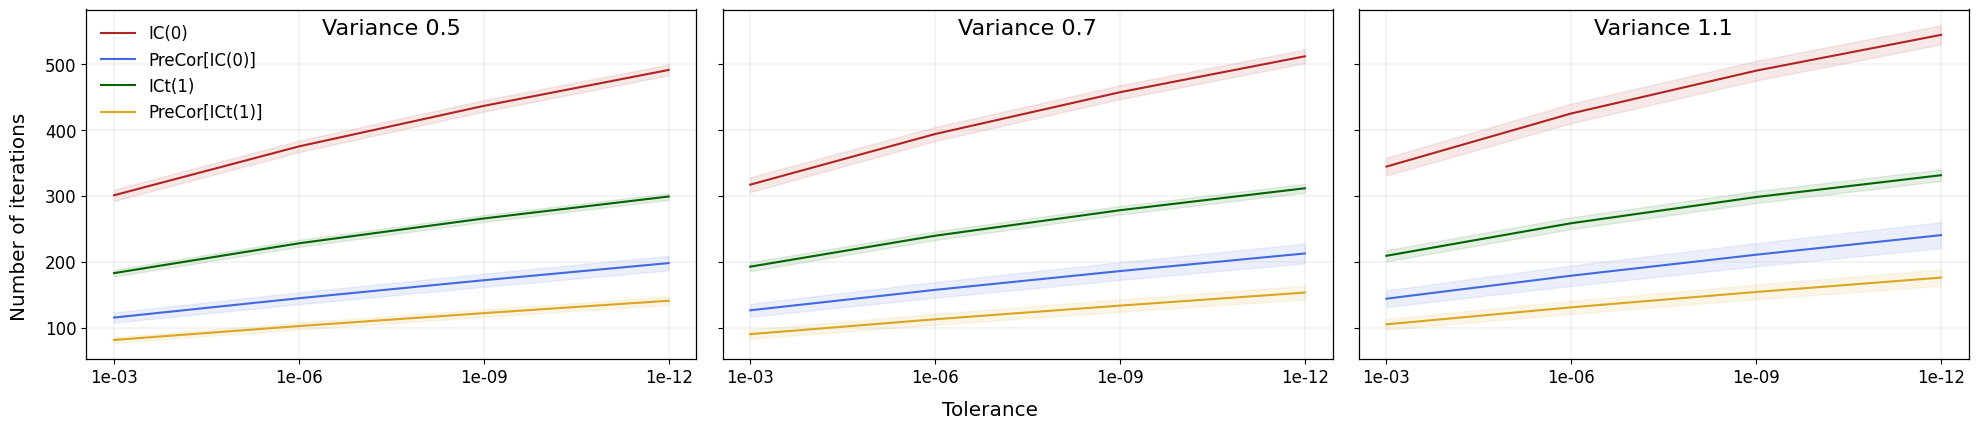

In [100]:
plt.rcParams['font.size'] = 12
# plt.rcParams['font.style'] = 'normal'
plt.rcParams['axes.linewidth'] = 0.9
fig_1, axes_1 = print_for_paper(256, df_precor_gnn, df_class_prec, figsize=(20, 4.5), print_iters=True);

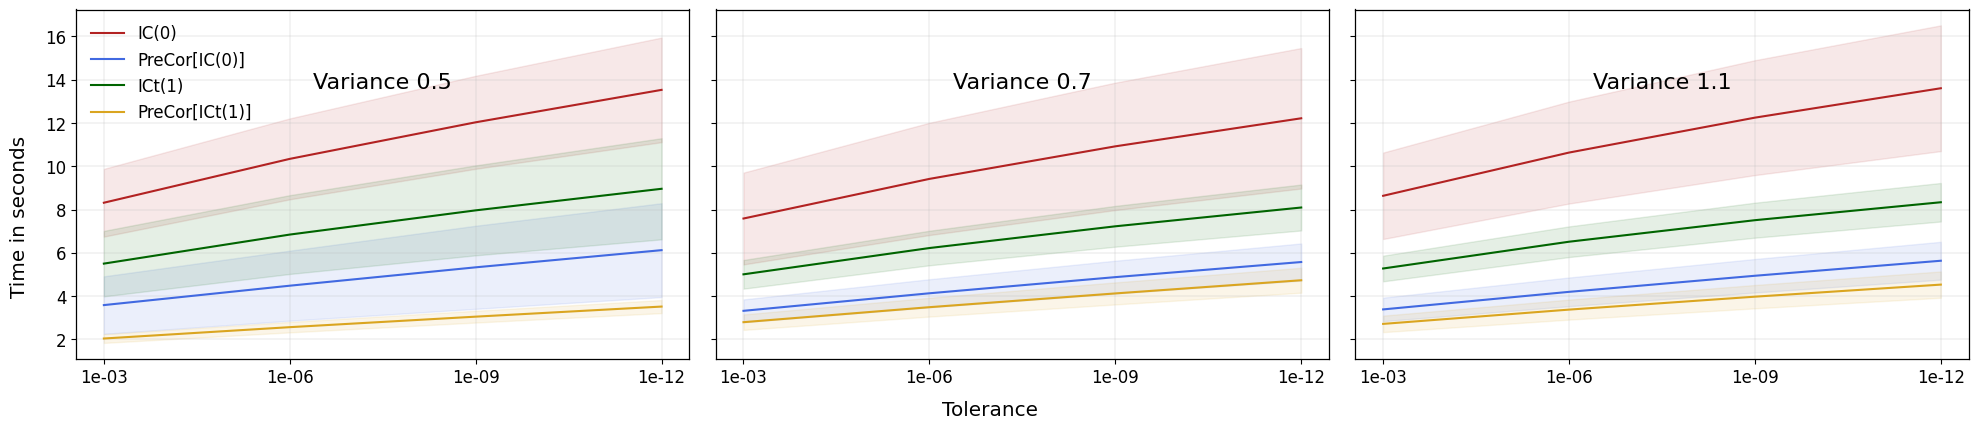

In [101]:
fig_1, axes_1 = print_for_paper(256, df_precor_gnn, df_class_prec, figsize=(20, 4.5), print_iters=False);

In [ ]:
[1.0056, 0.14208], 1e-06: [1.257, 0.16833], 1e-09: [1.4605, 0.194], 1e-12: [1.6335, 0.21383]

In [216]:
m_ = np.array([1.0056, 1.257, 1.4605, 1.6335])
std = np.array([0.14208, 0.16833, 0.194, 0.21383])

(0.5, 2.5)

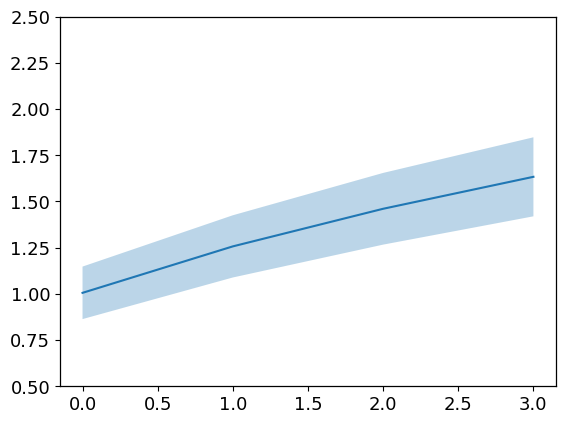

In [217]:
plt.plot(range(4), m_, )
plt.fill_between(range(4), m_-std, m_+std, alpha=.3)
plt.ylim(.5, 2.5)